In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Pre-functions

In [2]:
import graphviz, IPython
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter
from sklearn.tree import export_graphviz

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

In [3]:
from sklearn import metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

def metricas(y_train,y_pred_train,y_test,y_pred_test):
    valores=y.value_counts().index.to_list()
    
    # Matriz de confusion: Train
    cm_train=metrics.confusion_matrix(y_train,y_pred_train,labels=valores)
    df_cm=pd.DataFrame(cm_train,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Train')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    # Matriz de confusion: Test
    cm_test=metrics.confusion_matrix(y_test,y_pred_test,labels=valores)
    df_cm=pd.DataFrame(cm_test,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Test')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    precision_train=metrics.precision_score(y_train,y_pred_train,average='micro')
    precision_test=metrics.precision_score(y_test,y_pred_test,average='micro')
    recall_train=metrics.recall_score(y_train,y_pred_train,average='micro')
    recall_test=metrics.recall_score(y_test,y_pred_test,average='micro')
    f_score=f1_score(y_test,y_pred_test,average='micro')
    
    train = (accuracy_train*100, precision_train*100, recall_train*100)
    test = (accuracy_test*100, precision_test*100, recall_test*100)

    ind = np.arange(3)  # the x locations for the groups
    ind_n = np.arange(4)  # the x locations for the groups
    width = 0.3       # the width of the bars
    
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(111)
    
    rects1 = ax.bar(ind, train, width, color='r')
    rects2 = ax.bar(ind+width, test, width, color='g')
    rects3 = ax.bar(3, f_score*100, width, color='b')
    
    ax.set_ylabel('Scores')
    ax.set_xticks(ind_n + width/2)
    ax.set_xticklabels( ('Accuracy', 'Precisión', 'Recall', 'F1 Score') )
    ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%.3f'%round(h,3),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    plt.title('Puntajes')
    plt.ylim(0,120)
    plt.show()
    
    return 

# Loading Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 1. Data Cleaning

## 1.1. Missing Values

We do not have null data

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 1.2. Irrelevant Data

We have the variable "Id" that does not provide any information, therefore it will be eliminated.

In [7]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [8]:
df_clean = df.drop('Id', axis=1).copy()
df_clean.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## 1.3. Outliers

In [9]:
variables_numericas = df_clean.drop('Species', axis=1).columns.to_list()

We do not have very extreme values, nor do they indicate that it is erroneous data, therefore, outliers will not be treated in this case.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

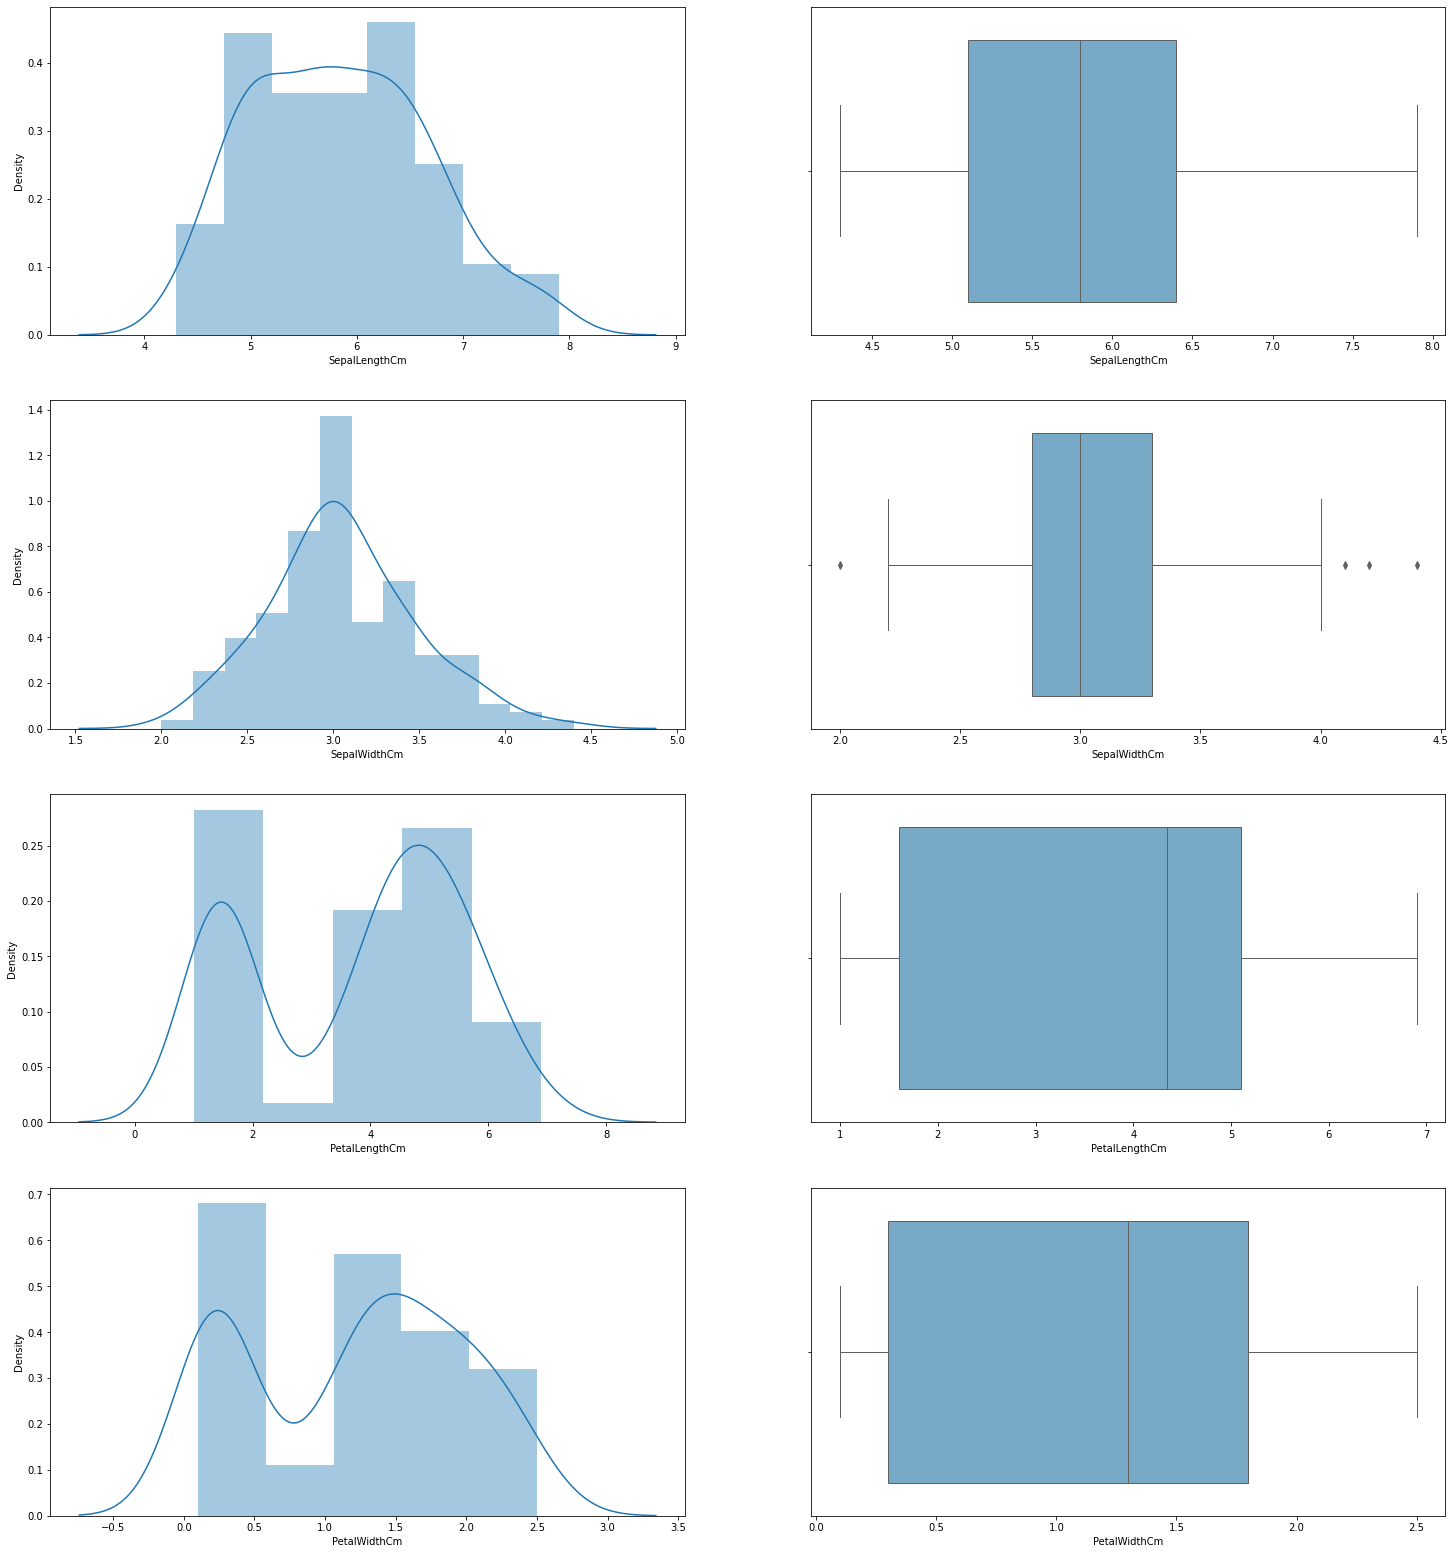

In [10]:
filas=len(df_clean.columns.to_list())
c=1
fig=plt.figure(figsize=(25,7*filas))
    
for i,j in enumerate(variables_numericas):
    plt.subplot(filas,2, c)
    sns.distplot(df_clean[j])
    c = c + 1
    
    plt.subplot(filas,2, c)
    ax1=sns.boxplot(x=df_clean[j],palette="Blues",linewidth=1)
    c = c + 1

plt.show()

# 2. EDA

## Balanced Target

In [11]:
datos_x = df_clean.Species.value_counts().index.to_list()
datos_y = df_clean.Species.value_counts().to_list()
suma = df_clean.Species.value_counts().sum()
print(df_clean.Species.value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


Podemos observar que el target está correctamente balanceado.

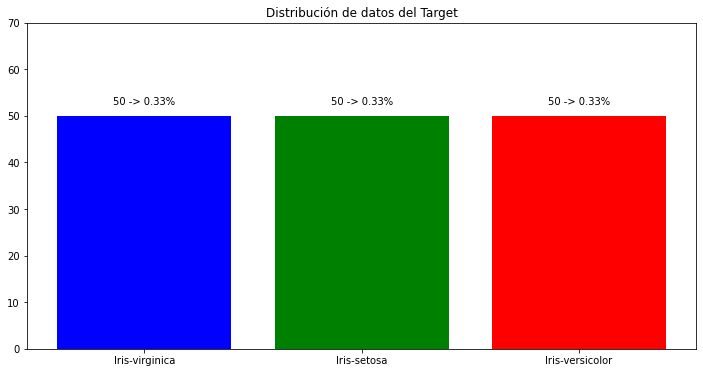

In [12]:
list_color=['blue','green','red']
plt.figure(figsize=(12,6))
graph = plt.bar(datos_x, datos_y, color=list_color)
plt.title('Distribución de datos del Target')

i = 0

for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.05,
             str(height)+" -> "+str(round(height/suma,2))+'%',
             ha='center')
    i+=1

plt.ylim(0,70)
plt.show()

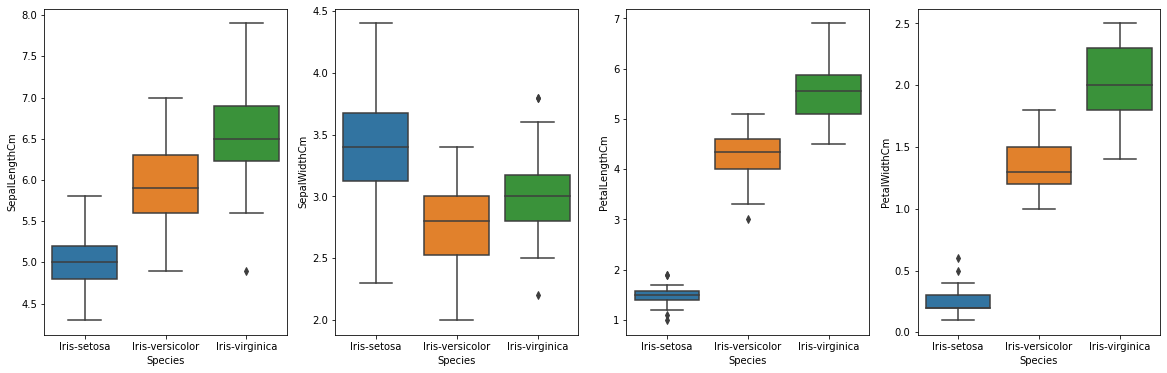

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20,6))

for i, variable in enumerate(variables_numericas):
    sns.boxplot(ax=axs[i],data=df_clean, x='Species', y=variable)
plt.show()

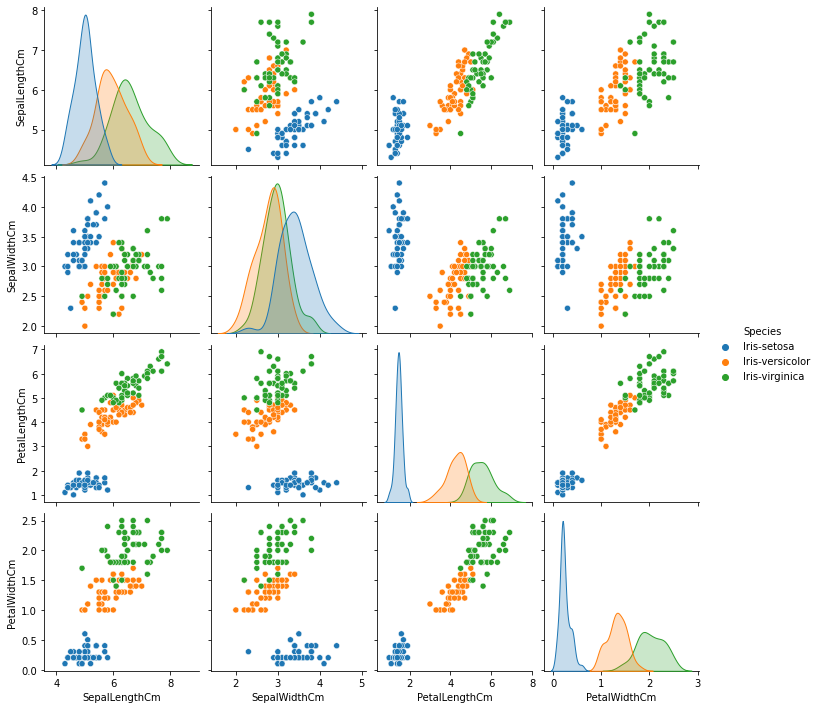

In [14]:
sns.pairplot(df_clean, hue='Species')
plt.show()

# 3. Feature Engineering

## 3.1. Feature Selection

### Filter Method -> ANOVA

We can see that all the variables pass the ANOVA test, this means that all the variables are associated with the target.

In [15]:
import scipy.stats as stats

ranking = pd.DataFrame({'Variable':[],
                        'p-value':[]})

for fila, variable in enumerate(variables_numericas):
    print('#'*20)
    prueba_anova = df_clean[['Species',variable]].copy()
    grouped_anova = prueba_anova.groupby(['Species'])
    anova_results_1 = stats.f_oneway(grouped_anova.get_group('Iris-setosa')[variable], grouped_anova.get_group('Iris-versicolor')[variable], grouped_anova.get_group('Iris-virginica')[variable])

    print(variable)
    print(anova_results_1.pvalue)
    
    ranking.loc[fila, 'Variable'] = variable
    ranking.loc[fila, 'p-value'] = anova_results_1.pvalue

    if anova_results_1.pvalue < 0.05:
        print('The variables are associated (H0 is rejected)')
    else:
        print('The variables are not associated (H0 is not rejected)')

ranking = ranking.sort_values(['p-value'])

####################
SepalLengthCm
1.6696691907693826e-31
The variables are associated (H0 is rejected)
####################
SepalWidthCm
1.3279165184572242e-16
The variables are associated (H0 is rejected)
####################
PetalLengthCm
3.0519758018278374e-91
The variables are associated (H0 is rejected)
####################
PetalWidthCm
4.376956957488959e-85
The variables are associated (H0 is rejected)


Thus we obtain the ranking of the most important variables for the target.

In [16]:
ranking

,Variable,p-value
2,PetalLengthCm,3.051976e-91
3,PetalWidthCm,4.376957e-85
0,SepalLengthCm,1.669669e-31
1,SepalWidthCm,1.327917e-16


### Correlation Matrix

We can see that some variables are highly correlated, this results in the model taking redundant information to predict.

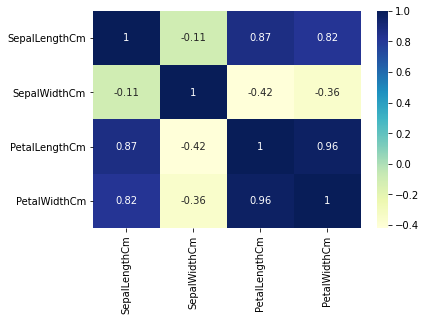

In [17]:
sns.heatmap(df_clean.drop('Species', axis=1).corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
ranking.sort_values(['p-value'])

,Variable,p-value
2,PetalLengthCm,3.051976e-91
3,PetalWidthCm,4.376957e-85
0,SepalLengthCm,1.669669e-31
1,SepalWidthCm,1.327917e-16


As "PetalLengthCm" is the most important variable for the target and it is associated a lot with "PetalWidthCm" and "SepalLengthCm", we will eliminate the two variables mentioned above, they are already highly correlated to "PetalLengthCm" and they are the ones that have the least association with the target. .

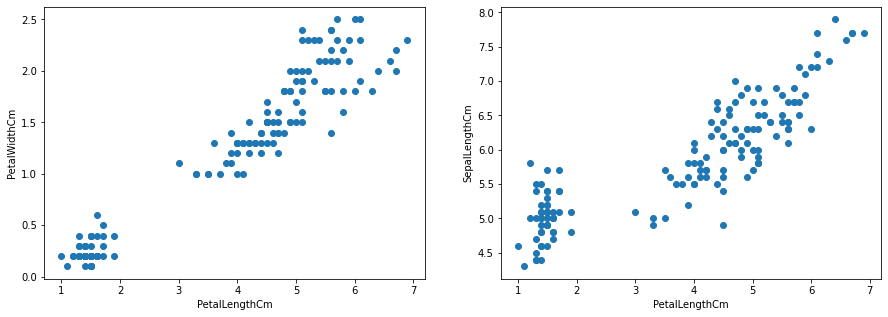

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(data=df_clean, x='PetalLengthCm',y='PetalWidthCm')
axs[0].set(xlabel='PetalLengthCm', ylabel='PetalWidthCm')

axs[1].scatter(data=df_clean, x='PetalLengthCm',y='SepalLengthCm')
axs[1].set(xlabel='PetalLengthCm', ylabel='SepalLengthCm')

plt.show()

Thus we obtain two variables that are associated with the target, and that do not have much correlation with each other.

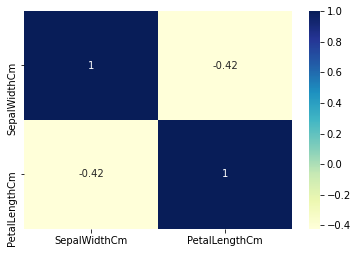

In [20]:
sns.heatmap(df_clean.drop(['PetalWidthCm','SepalLengthCm','Species'], axis=1).corr(), annot = True, cmap="YlGnBu")
plt.show()

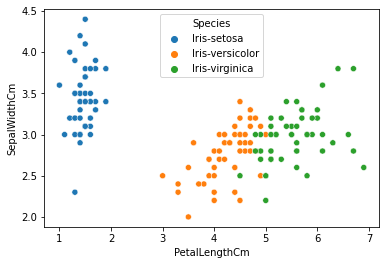

In [21]:
sns.scatterplot(data=df_clean, x='PetalLengthCm', y='SepalWidthCm', hue='Species')
plt.show()

In [22]:
df_final = df_clean[['PetalLengthCm','SepalWidthCm','Species']].copy()
df_final.head(2)

,PetalLengthCm,SepalWidthCm,Species
0,1.4,3.5,Iris-setosa
1,1.4,3.0,Iris-setosa


## 3.2. Feature Transformation

In [23]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_final['Species'] = enc.fit_transform(df_final['Species'])
df_final.head(3)

,PetalLengthCm,SepalWidthCm,Species
0,1.4,3.5,0
1,1.4,3.0,0
2,1.3,3.2,0


# 4. Training and Validation

In [24]:
X = df_final.drop('Species', axis=1)
y = df_final['Species']

## 4.1. Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## 4.2. Machine Learning algorithms

### Decision Tree

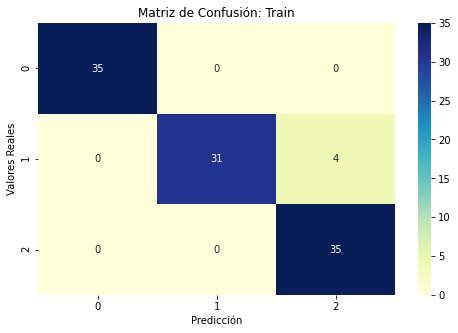

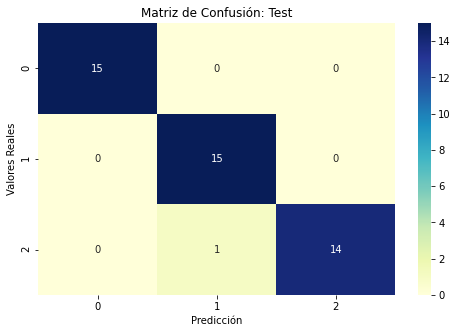

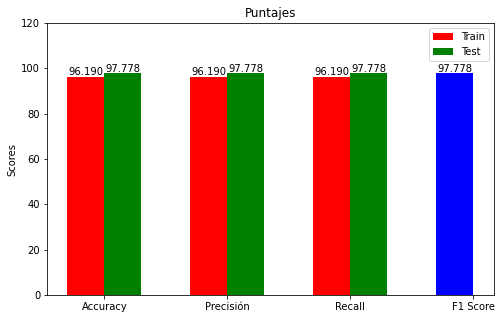

In [26]:
from sklearn.tree import DecisionTreeClassifier
arbolDecision = DecisionTreeClassifier(max_depth=4)
arbolDecision.fit(X_train, y_train)
y_pred_train = arbolDecision.predict(X_train)
y_pred_test = arbolDecision.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

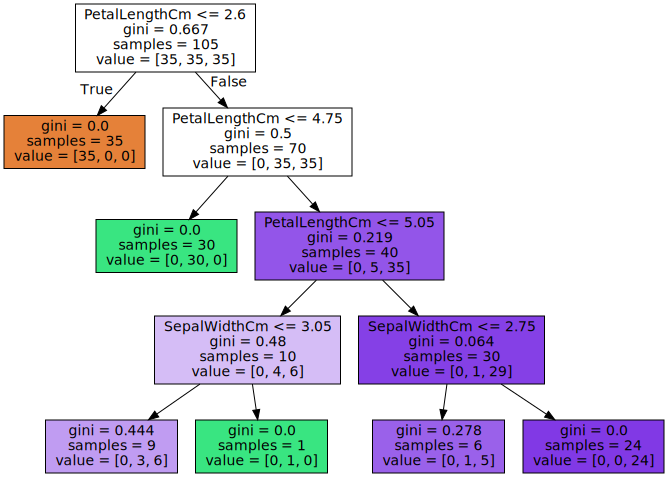

In [27]:
draw_tree(arbolDecision, X)

### GridSearchCV with Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[55,56,57,58,59,60],
              'max_depth':[1,2,3,4,5,6] ,
              'n_jobs':[-1],
              'max_features':[1]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=parameters)

In [29]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'max_features': [1],
                         'n_estimators': [55, 56, 57, 58, 59, 60],
                         'n_jobs': [-1]})

In [30]:
best_param= grid_search.best_params_
best_param

{'max_depth': 5, 'max_features': 1, 'n_estimators': 55, 'n_jobs': -1}

In [31]:
best_model = grid_search.best_estimator_

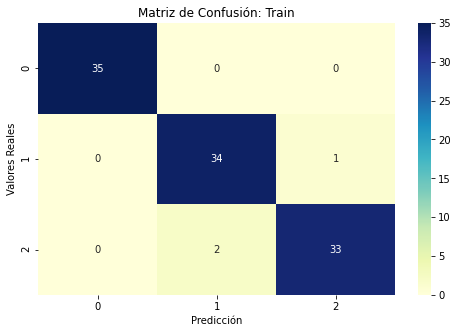

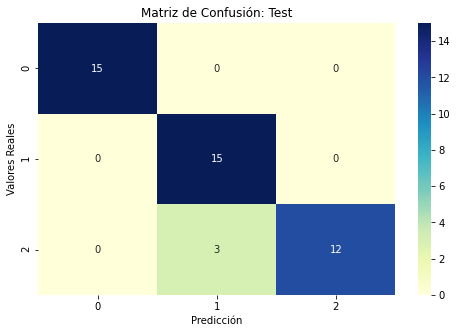

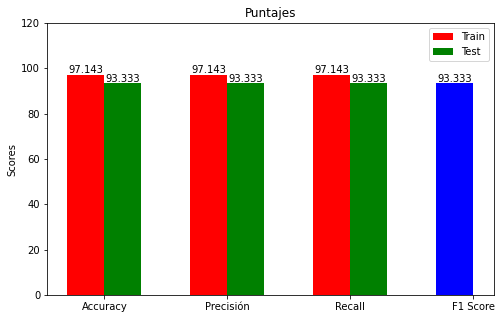

In [32]:
y_pred_train=best_model.predict(X_train)
y_pred_test= best_model.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

# Conclusions

We have two powerful algorithms, but which one should we choose? Although both give us powerful scores, with the RandomForest being a complex algorithm, we lose interpretability, but with the decision tree we obtain interpretability, that is, we can know how the result was reached.